# XML -> JSON

In [ ]:


'''
import xmltodict
import os

xml_path = './xml/'
josn_path = './json/'



file_list = os.listdir(xml_path)

for i in range(len(file_list)):
    temp_str = file_list[i]
    name = temp_str.replace('.xml', '')
    name = name[:80]
    print(name)        #작업중인 파일 이름

    #읽어오기
    with open(xml_path + file_list[i], 'r', encoding='UTF8') as f:
        smlString = f.read()
    jsonString = json

'''


# JSON 파일에서 labeling

## JSON 파일 불러오기

In [31]:
import json
import os
import cv2

#json경로 가져오기
json_path = '../data/instances_default.json'

with open(json_path, 'r', encoding='utf-8') as j:
    json_data = json.load(j)

print(f"json type: {type(json_data)}")
print("json data:", json_data) 




json type: <class 'dict'>
json data: {'licenses': [{'name': '', 'id': 0, 'url': ''}], 'info': {'contributor': '', 'date_created': '', 'description': '', 'url': '', 'version': '', 'year': ''}, 'categories': [{'id': 1, 'name': 'cat', 'supercategory': ''}, {'id': 2, 'name': 'dog', 'supercategory': ''}], 'images': [{'id': 1, 'width': 640, 'height': 480, 'file_name': '01.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}], 'annotations': [{'id': 1, 'image_id': 1, 'category_id': 2, 'segmentation': [], 'area': 42499.856999999996, 'bbox': [468.94, 92.01, 171.06, 248.45], 'iscrowd': 0, 'attributes': {'occluded': False}}, {'id': 2, 'image_id': 1, 'category_id': 1, 'segmentation': [], 'area': 42994.3464, 'bbox': [3.96, 183.38, 200.88, 214.03], 'iscrowd': 0, 'attributes': {'occluded': False}}]}


In [9]:
#keys값 확인
print(json_data.keys())

dict_keys(['licenses', 'info', 'categories', 'images', 'annotations'])


In [14]:
#변수 선언
category_info = json_data['categories']
images_info = json_data['images']
annoations_info = json_data['annotations']

label_dict = {1:'cat', 2:'dog'}
#0번은 백그라운드 - two station model에서는

In [17]:
print(label_dict)

{1: 'cat', 2: 'dog'}


In [18]:
print(category_info)
print(images_info)
print(annoations_info)

[{'id': 1, 'name': 'cat', 'supercategory': ''}, {'id': 2, 'name': 'dog', 'supercategory': ''}]
[{'id': 1, 'width': 640, 'height': 480, 'file_name': '01.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}]
[{'id': 1, 'image_id': 1, 'category_id': 2, 'segmentation': [], 'area': 42499.856999999996, 'bbox': [468.94, 92.01, 171.06, 248.45], 'iscrowd': 0, 'attributes': {'occluded': False}}, {'id': 2, 'image_id': 1, 'category_id': 1, 'segmentation': [], 'area': 42994.3464, 'bbox': [3.96, 183.38, 200.88, 214.03], 'iscrowd': 0, 'attributes': {'occluded': False}}]


In [81]:
images_info

[{'id': 1,
  'width': 640,
  'height': 480,
  'file_name': '01.jpg',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0}]

In [35]:

print(type(images_info))

#list 안에있는 dict 뽑아내기
#만약 list안에 dict 2개 있었다면 for문 2번 돌리면 됨
for image_json in images_info:
    print(image_json,'\n', type(image_json))
    #key 뽑아내기
    file_name = image_json['file_name']
    img_width = image_json['width']
    img_height = image_json['height']
    img_id = image_json['id']
    print(file_name)




<class 'list'>
{'id': 1, 'width': 640, 'height': 480, 'file_name': '01.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0} 
 <class 'dict'>
01.jpg


## 이미지 파일에 시각화

In [36]:
annoations_info

[{'id': 1,
  'image_id': 1,
  'category_id': 2,
  'segmentation': [],
  'area': 42499.856999999996,
  'bbox': [468.94, 92.01, 171.06, 248.45],
  'iscrowd': 0,
  'attributes': {'occluded': False}},
 {'id': 2,
  'image_id': 1,
  'category_id': 1,
  'segmentation': [],
  'area': 42994.3464,
  'bbox': [3.96, 183.38, 200.88, 214.03],
  'iscrowd': 0,
  'attributes': {'occluded': False}}]

box coordinate: 468 92 171 248
dog
yolo 좌표>>> dog 0.86484375 0.45 0.2671875 0.5166666666666667
box coordinate: 3 183 200 214
cat
yolo 좌표>>> cat 0.1609375 0.6041666666666666 0.3125 0.44583333333333336


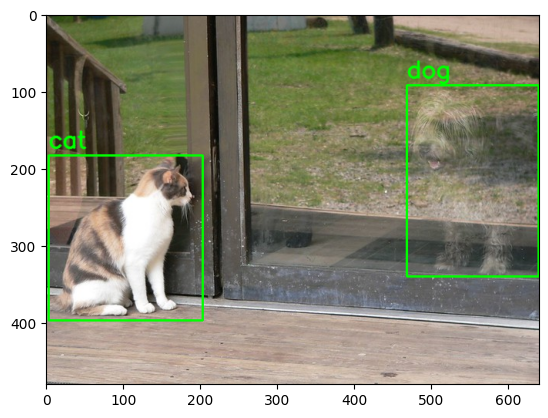

In [75]:
#image 읽기
img_path = os.path.join('../data/', file_name)
image = cv2.imread(img_path)
#RGV
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#bbox info
for anno_json in annoations_info:
    if img_id == anno_json['image_id']:
        bbox = anno_json['bbox']
        x = int(bbox[0])
        y = int(bbox[1])
        w = int(bbox[2])
        h = int(bbox[3])
        print('box coordinate:',x, y, w, h)

        #draw bbox
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        #label
        category_id = anno_json['category_id']  #1,2 넘겨줌
        label_name = label_dict[category_id]    #1이면 cat, 2이면 dog
        print(label_name)

        #label 글씨 써주기 위해해
        image = cv2.putText(image, label_name, (x, y-10),
                             cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2, cv2.LINE_AA)

        ############
        # JSON 어노테이션 값 yolo 변환
        center_x = ((2*x+w)/(2*img_width))
        center_y = ((2*y+h)/(2*img_height))
        yolo_w = w/img_width
        yolo_h = h/img_height

        print("yolo 좌표>>>", label_name, center_x, center_y, yolo_w, yolo_h)
        

        #파일 이름만 뽑기
        file_name_temp = file_name.replace('.jpg', '')
        #print(file_name_temp)

    #yolo -> text변환
    with open(f"{file_name_temp}.txt", "a") as f:
        f.write(f"{label_name} {center_x} {center_y} {yolo_w} {yolo_h}\n")




import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()                              


## JSON 어노테이션 값 yolo 변환

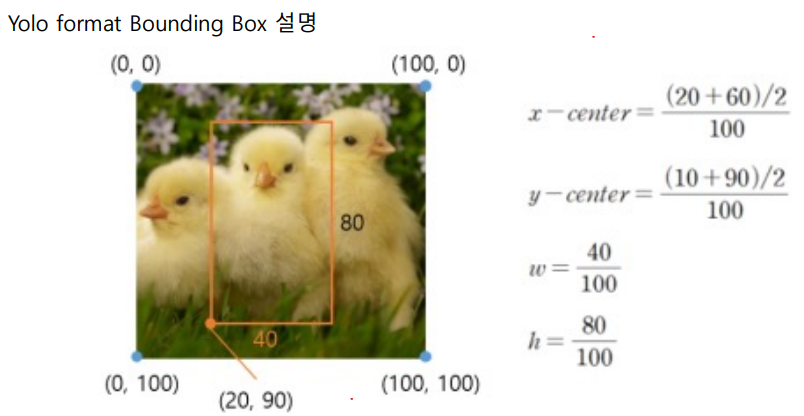

x = 20, y = 10, w = 40, h = 80

width = 100, height = 100

x_center = (2*x + w)/ 2*width = 40/100

y_center = (2*y + h)/ 2*height = 50/100

width = w/width

height = h/height

# XML 파일에서 labeling

## XML 파일 가져오기
: 고유 접근방식이므로 미리 구조를 확인해야함

In [48]:
import os
import cv2
import matplotlib.pyplot as plt
from xml.etree.ElementTree import parse

In [78]:
'''
  <image id="0" name="01.jpg" width="640" height="480">
    <box label="dog" occluded="0" source="manual" xtl="468.94" ytl="92.01" xbr="640.00" ybr="340.46" z_order="0">
    </box>
    <box label="cat" occluded="0" source="manual" xtl="3.96" ytl="183.38" xbr="204.84" ybr="397.41" z_order="0">
    </box>
  </image>

'''
###yolo text 저장할 때 dog, cat -> 0,1 저장하기 위한 dict
label_dict = {'cat':0, 'dog':1}


def xml_read(xml_path):
    root = parse(xml_path).getroot()

    image_info = root.findall('image')
    #print(image_info)  #element <image>의 위치

    for image in image_info:
        bbox = image.findall('box')

        #image 변수 
        img_width = image.attrib['width']
        img_height = image.attrib['height']
        img_name = image.attrib['name']
        image_name_temp = img_name
        img_name = os.path.join('../data/', img_name)

        #print(img_width, img_height)
        # 640 480

        #이미지 가지고오기
        image = cv2.imread(img_name)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    
        '''
        <box label="dog" occluded="0" source="manual" xtl="468.94" ytl="92.01" xbr="640.00" ybr="340.46" z_order="0">
        </box>
        <box label="cat" occluded="0" source="manual" xtl="3.96" ytl="183.38" xbr="204.84" ybr="397.41" z_order="0">
        </box>
        '''
    for box_info in bbox:
        label = box_info.attrib['label']    #dog, cat

        #값(str) -> i소수점 포함이라 float변환-> int 변환
        #?????????????????????
        xt1 = int(float(box_info.attrib['xtl']))
        yt1 = int(float(box_info.attrib['ytl']))
        xbr1 = int(float(box_info.attrib['xbr']))   #x+w
        ybr1 = int(float(box_info.attrib['ybr']))   #y+h
        #print(label, xt1, yt1, xbr1, ybr1)
        #dog 468 92 640 340
        #cat 3 183 204 397


        #시각화
        image = cv2.rectangle(image, (xt1, yt1), (xbr1, ybr1), (0,255,255),2)
        #라벨 쓰기
        image = cv2.putText(image, label, (xt1, yt1-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,255), 2)

        ##########################
        #XML annotation -> YOLO
        img_width_int = int(img_width)
        img_height_int = int(img_height)

        #yolo 계산
        center_x = (xbr1 + xt1) / (2 * img_width_int) #xbr1 + xt1 =(x+w+x) = 2*x + w
        center_y = (ybr1 + yt1) / (2 * img_height_int)
        yolo_w = (xbr1 - xt1) / img_width_int
        yolo_h = (ybr1 - yt1) / img_height_int

        print(label, center_x, center_y, yolo_w, yolo_h)
        
        #file name
        image_name_temp = image_name_temp.replace('.jpg', '')

        #yolo -> text
        #dog, cat -> 0,1
        label_num = label_dict[label]

        with open(f"{image_name_temp}.txt", "a") as f:
            f.write(f"{label_num} {center_x} {center_y} {yolo_w} {yolo_h} \n")







    plt.imshow(image)
    plt.show()

        
        
        

dog 0.865625 0.45 0.26875 0.5166666666666667
cat 0.16171875 0.6041666666666666 0.3140625 0.44583333333333336


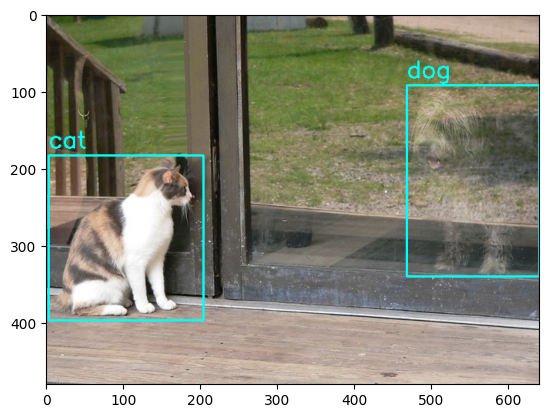

In [79]:
xml_read('./xml/annotations.xml')
